In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\dataset.csv")

In [3]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [4]:
df.shape

(26707, 34)

In [5]:
df.size

908038

In [6]:
df.head

<bound method NDFrame.head of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                  

In [7]:
df.tail

<bound method NDFrame.tail of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                  

In [8]:
df.describe

<bound method NDFrame.describe of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0              

In [9]:
df.isnull()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26703,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26704,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
26705,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [11]:
df.notnull

<bound method DataFrame.notnull of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0             

In [12]:
df.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [13]:
(df.isnull().sum()/(len(df)))*100

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur             45.957989
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                      

In [14]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [15]:
df["h1n1_awareness"].fillna(df["h1n1_awareness"].median(),inplace=True)
df["contact_avoidance"].ffill(axis=0,inplace=True)
df["avoid_touch_face"].bfill(axis=0,inplace=True)

df["dr_recc_h1n1_vacc"].ffill(axis=0,inplace=True)
df["dr_recc_seasonal_vacc"].ffill(axis=0,inplace=True)
df["chronic_medic_condition"].bfill(axis=0,inplace=True)
df["cont_child_undr_6_mnths"].ffill(axis=0,inplace=True)

df["is_health_worker"].bfill(axis=0,inplace=True)
df["has_health_insur"].ffill(axis=0,inplace=True)
df["is_h1n1_vacc_effective"].ffill(axis=0,inplace=True)
df["is_h1n1_risky"].ffill(axis=0,inplace=True)

df["sick_from_h1n1_vacc"].bfill(axis=0,inplace=True)
df["is_seas_vacc_effective"].ffill(axis=0,inplace=True)
df["is_seas_risky"].bfill(axis=0,inplace=True)
df["sick_from_seas_vacc"].ffill(axis=0,inplace=True)

df.dropna(subset=["h1n1_worry"],inplace=True)
df.dropna(subset=["antiviral_medication"],inplace=True)
df.dropna(subset=["bought_face_mask"],inplace=True)
df.dropna(subset=["wash_hands_frequently"],inplace=True)
df.dropna(subset=["avoid_large_gatherings"],inplace=True)
df.dropna(subset=["reduced_outside_home_cont"],inplace=True)


df["qualification"].fillna(df["qualification"].mode()[0],inplace=True)
   
df["income_level"].fillna(df["income_level"].mode()[0],inplace=True)
df["marital_status"].fillna(df["marital_status"].mode()[0],inplace=True)
df["housing_status"].fillna(df["housing_status"].mode()[0],inplace=True)   
df["employment"].fillna(df["employment"].mode()[0],inplace=True)
df["no_of_adults"].bfill(axis=0,inplace=True)
df["no_of_children"].ffill(axis=0,inplace=True)

In [16]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [17]:
df.drop

<bound method DataFrame.drop of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                

In [18]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


<Axes: >

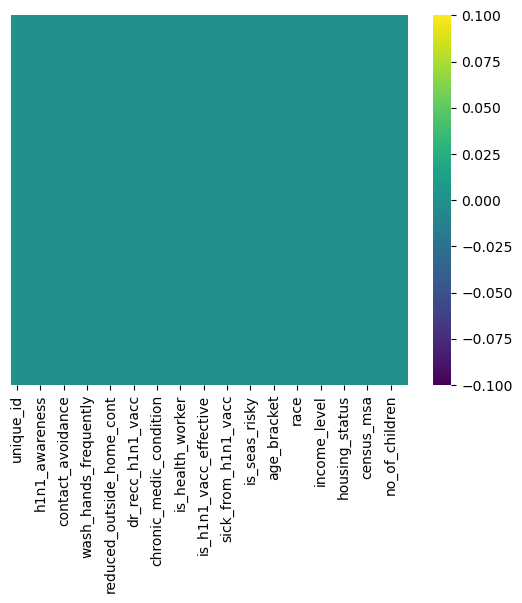

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<Axes: >

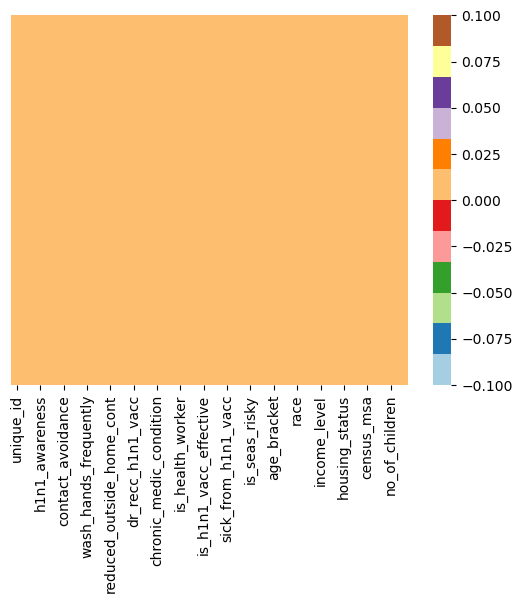

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="Paired")

In [21]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

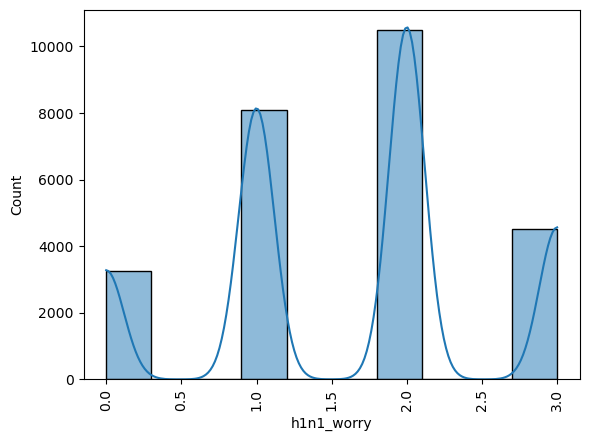

In [22]:
sns.histplot(df["h1n1_worry"],bins=10,kde=True)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='h1n1_worry'>

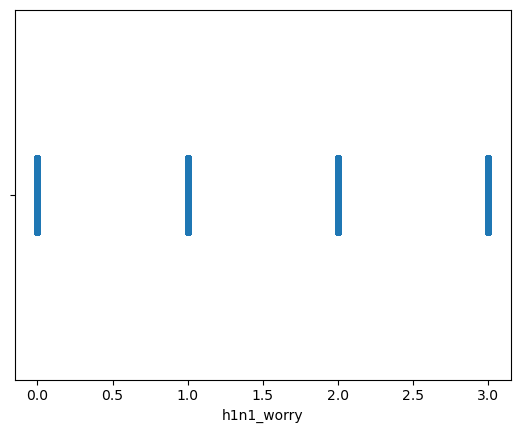

In [23]:
sns.stripplot(x="h1n1_worry",data=df)

<Axes: xlabel='h1n1_worry', ylabel='Density'>

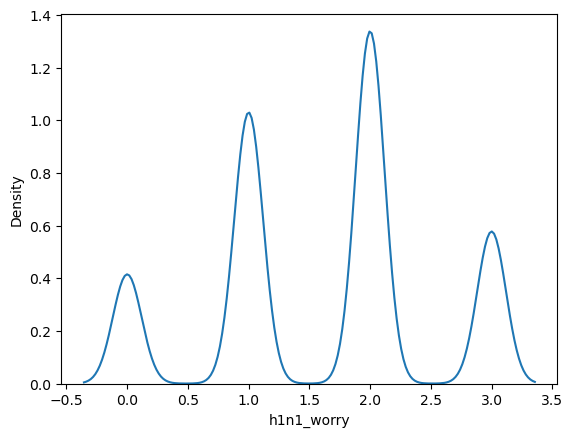

In [24]:
sns.kdeplot(df.h1n1_worry)

<Axes: xlabel='h1n1_worry'>

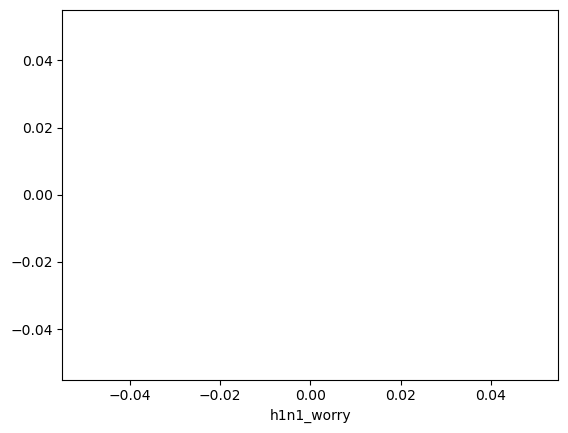

In [25]:
sns.scatterplot(x="h1n1_worry",data=df)

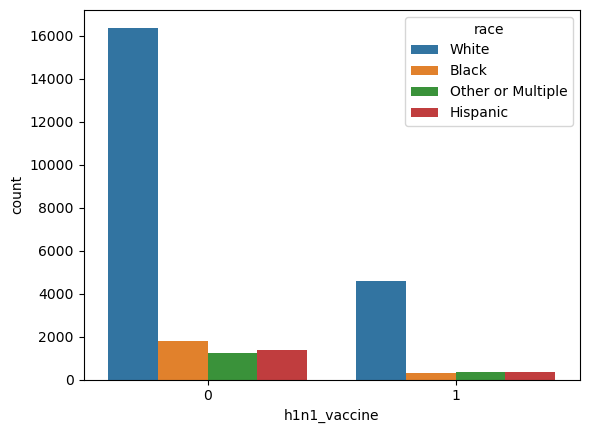

In [26]:
sns.countplot(x=df['h1n1_vaccine'],hue=df['race'])
plt.show()

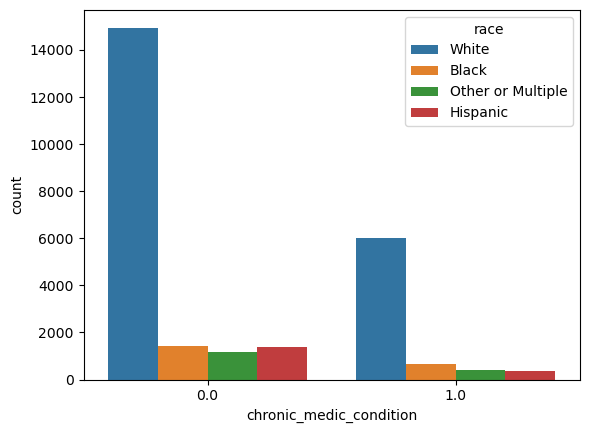

In [27]:
sns.countplot(x=df['chronic_medic_condition'],hue=df['race'])
plt.show()

In [28]:
a=df.groupby("age_bracket")["age_bracket"].count()

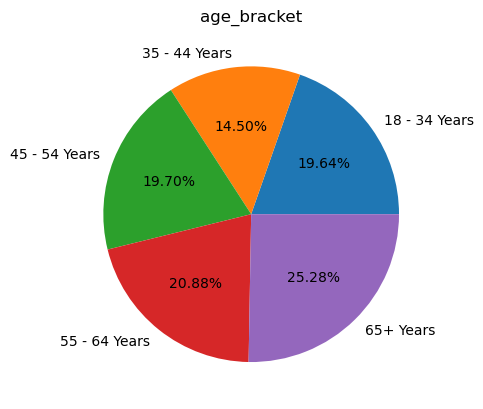

In [29]:
plt.pie(a,labels=a.index,autopct="%.2f%%")
plt.title("age_bracket")
plt.show()


In [49]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
categorical_cols=["age_bracket","qualification","race","sex","income_level","marital_status","housing_status","employment","census_msa"]
encoder=OneHotEncoder(drop='first',sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(df[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols))

In [50]:
numerical_cols=["unique_id","h1n1_worry","h1n1_awareness","antiviral_medication","contact_avoidance","bought_face_mask","wash_hands_frequently","avoid_large_gatherings","reduced_outside_home_cont","avoid_touch_face","dr_recc_h1n1_vacc","dr_recc_seasonal_vacc","chronic_medic_condition","cont_child_undr_6_mnths","is_health_worker","has_health_insur","is_h1n1_vacc_effective","is_h1n1_risky","sick_from_h1n1_vacc","is_seas_vacc_effective","is_seas_risky","sick_from_seas_vacc","no_of_adults","no_of_children"]
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(df[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

In [51]:
x=pd.concat([encoder_cols,scaled_cols],axis=1)
y=df['h1n1_vaccine']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
log=LogisticRegression()

In [67]:
log.fit(x_train,y_train)

LogisticRegression()

In [68]:
print('Train Score:',log.score(x_train,y_train))

Train Score: 0.8331910453424398


In [69]:
print('Test Score:',log.score(x_test,y_test))

Test Score: 0.830804248861912


In [70]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [72]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     16609
           1       0.68      0.41      0.51      4475

    accuracy                           0.83     21084
   macro avg       0.77      0.68      0.71     21084
weighted avg       0.82      0.83      0.82     21084



In [74]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4150
           1       0.67      0.40      0.50      1122

    accuracy                           0.83      5272
   macro avg       0.76      0.67      0.70      5272
weighted avg       0.82      0.83      0.81      5272



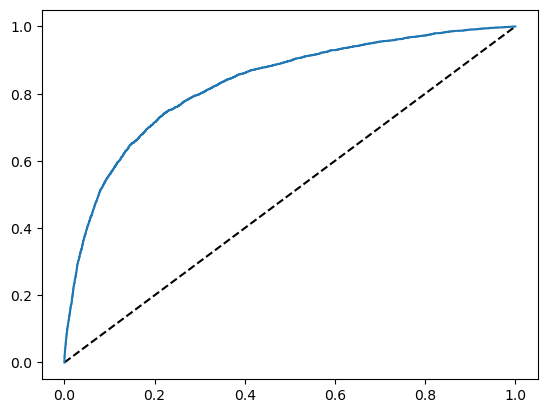

In [77]:
roc=log.predict_proba(x_train)[:,1]

fpr,tpr,threshold=metrics.roc_curve(y_train,roc)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label='logistic')
plt.show()

In [78]:
metrics.roc_auc_score(y_train,roc)

0.8286174117754693

In [80]:
from sklearn.metrics import matthews_corrcoef

mcc=matthews_corrcoef(y_test,pred_test)
print('MCC:',mcc)

MCC: 0.42621001590260027


In [85]:
param_grid={
    'penalty':['l1','l2'],
    'C':[0.1,0.5,1,5,10]
}

In [86]:
from sklearn.model_selection import GridSearchCV

In [88]:
grid=GridSearchCV(estimator=log, param_grid=param_grid, cv= 5)

In [90]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [93]:
best_param=grid.best_params_
best_model=grid.best_estimator_

In [95]:
y_pred=best_model.predict(x_test)

In [96]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score

In [98]:
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)

In [99]:
print('Best Param:',best_param)
print('Accuracy',acc)
print('Precision: ',pre)
print('Recall: ',rec)
print("F1 Score:",f1)
print('AUC-ROC: ',roc_auc)

Best Param: {'C': 0.1, 'penalty': 'l2'}
Accuracy 0.8304248861911988
Precision:  0.6743119266055045
Recall:  0.393048128342246
F1 Score: 0.4966216216216216
AUC-ROC:  0.6708614135687134
